In [1]:
import random
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from scipy.stats import t
from scipy.stats import norm
from scipy.stats import chi2

In [2]:
#5, 10, 15, 30, 40, 50 количество элементов в выборках
# после генерации выборок сделать прошлую лабу, построить график с доверетильенвм интервалом, мат ожидание, ср.кв. откл.
#minVal maxVal нужны просто для проверки, что попало в интервал, но ваще не обязательно
# https://docs.scipy.org/doc/scipy/tutorial/integrate.html



In [2]:
def Norm(x, m, s):
    return (1 / ((2 * math.pi) ** 0.5 * s)) * math.e ** ((-1 / 2) * ((x - m) / (s)) ** 2)


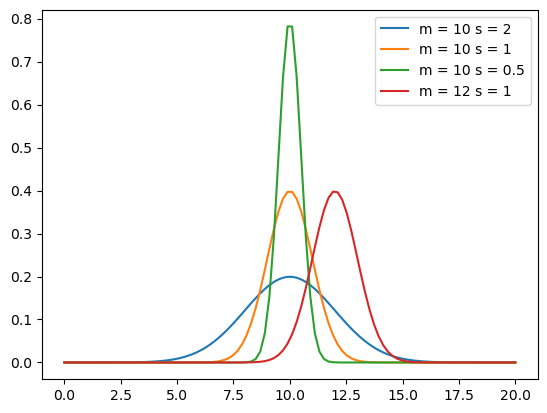

In [3]:
M = [10, 10, 10, 12]
S = [2, 1, 0.5, 1]
l = []
for i in range(len(M)):
    X = np.linspace(0, 20, 100)
    y = []
    for x in X:
        y.append(Norm(x, M[i], S[i]))
    plt.plot(X, y)
    l.append("m = " + str(M[i]) + " s = " + str(S[i]))
plt.legend(l)
plt.show()

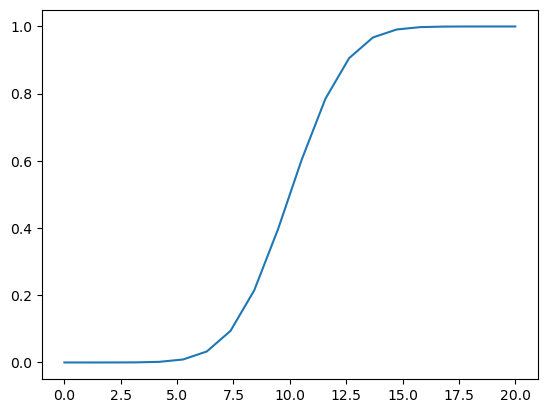

In [4]:
x = np.linspace(0, 20, 20)
y = []
for x_i in x:
    result = integrate.quad(Norm, -np.inf, x_i, args=(10, 2))
    y.append(result[0])
plt.plot(x, y)
plt.show()

In [5]:
#находим X при заданной вероятности по функции распределения, передается IFunc
def GetArg(F, minArg, maxArg, Value, eps):
    while abs((maxArg - minArg) / (maxArg)) > eps:
        midArg = (minArg + maxArg) / 2
        #берем вероятность из функции распр.
        midVal = F(midArg)
        if midVal > Value:
            maxArg = midArg
        else:
            minArg = midArg
    return (minArg + maxArg) / 2

In [6]:
def GetTabF(F, minArg, maxArg, pointsCount):
    YTab = []
    XTab = []
    #находим вероятности по мин и макс аргументу
    minVal = F(minArg)
    maxVal = F(maxArg)
    dVal = (maxVal - minVal) / (pointsCount - 1)
    YTab.append(minVal)
    XTab.append(minArg)
    for i in range(1, pointsCount - 1):
        YTab.append(minVal + dVal * i)
        XTab.append(GetArg(F, minArg, maxArg, YTab[i], 10**-15))
    YTab.append(maxVal)
    XTab.append(maxArg)
    return [XTab, YTab]

In [7]:
def NormIntegrate(x):
    return integrate.quad(Norm, -np.inf, x, args=(10, 2))[0]


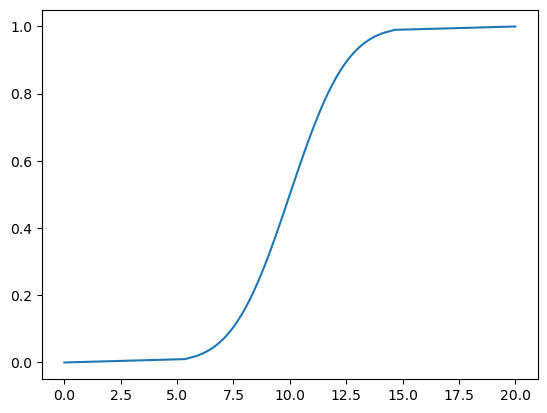

In [8]:
min_a = 0
max_a = 20
tabSize = 101
tab_XY = GetTabF(NormIntegrate, min_a, max_a, tabSize)
plt.plot(tab_XY[0], tab_XY[1])
plt.show() 

In [9]:
def Model_N(XTab, YTab, p):
    for i in range(1, len(XTab)):
        if YTab[i-1] <= p <= YTab[i]:
            y = ((p - YTab[i]) / (YTab[i-1] - YTab[i])) * XTab[i-1] + ((p - YTab[i-1]) / (YTab[i] - YTab[i-1])) * XTab[i]
            return y

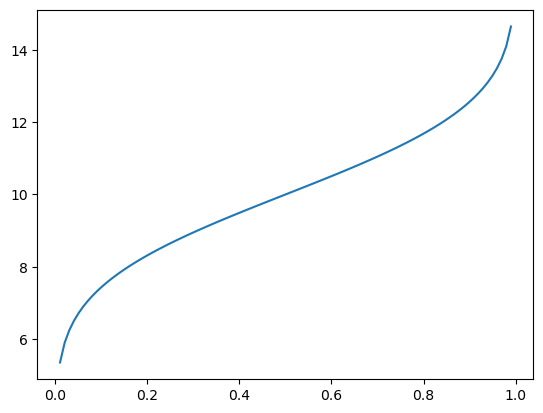

In [25]:
p = np.linspace(0, 1, 100)
y = []
for p_i in p:
    y.append(Model_N(tab_XY[0], tab_XY[1], p_i))
plt.plot(p, y)
plt.show()

In [ ]:
p = 0.95
q_t = norm.ppf(p, loc=10, scale=2)
q_p = Model_N(tab_XY[0], tab_XY[1], p)

print(q_t, q_p)


13.289707253902945 13.289707711697378


In [35]:
def get_freq(nums, a, b, k):
    freq = [0] * (k + 1)
    step = (b - a) / k
    x = []
    first_elem = a
    while first_elem <= b:
        x.append(first_elem)
        first_elem += step
    if(len(x) < len(freq) and x[-1] < b):
        x.append(b)
    for num in nums:
        for i in range(len(x) - 1):
            if x[i] <= num < x[i+1]:
                freq[i] += 1
                break
    freq = [x / (len(nums) * step) for x in freq]
    s = 0
    for f in freq:
        s += f * step
    #print(s)
    return [freq, x]

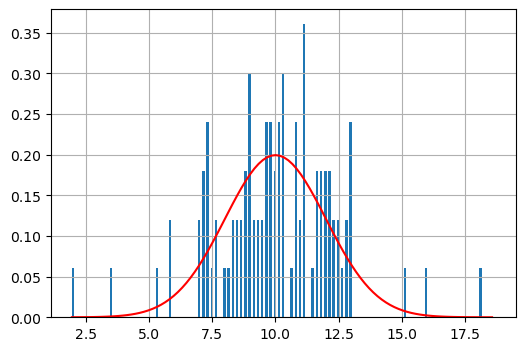

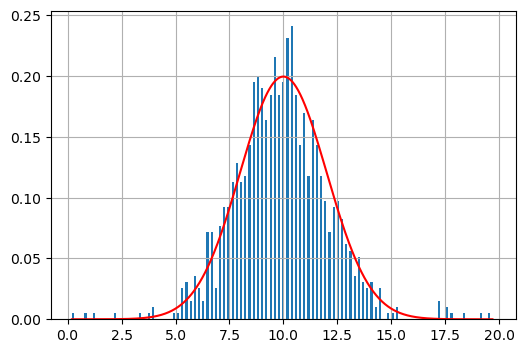

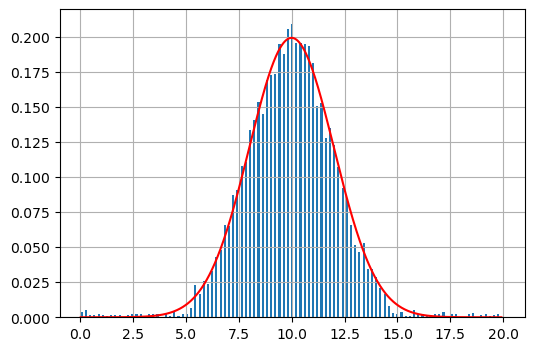

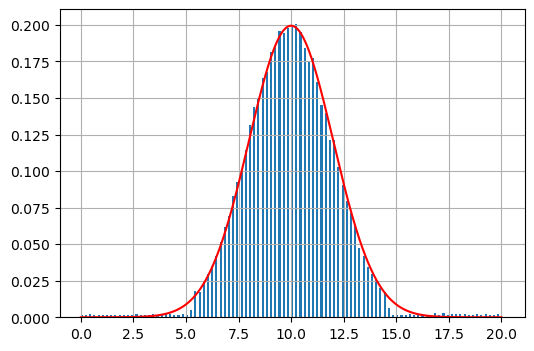

In [38]:
N = [10**2, 10**3, 10**4, 10**5]
S = []
for n in N:
    nums = []

    for i in range(n):
        p = random.random()
        num = Model_N(tab_XY[0], tab_XY[1], p)
        nums.append(num)

    arr = get_freq(nums, min(nums), max(nums), 100)
    x = arr[1]
    y = arr[0]

    

    x_t = np.linspace(min(nums), max(nums), n)
    y_t = (1 / ((2 * math.pi) ** 0.5 * 2)) * math.e ** ((-1 / 2) * ((x_t - 10) / (2)) ** 2)

    s = 0
    for i in range(len(x)):
        s += (Norm(x[i], 10, 2) - y[i]) ** 2 / (100)
    S.append(s)

    fig = plt.figure(figsize=(6, 4))
    ax = fig.add_subplot()
    ax.bar(x, y, align='edge', width=0.1)
    ax.grid()
    ax.plot(x_t, y_t, color='red')



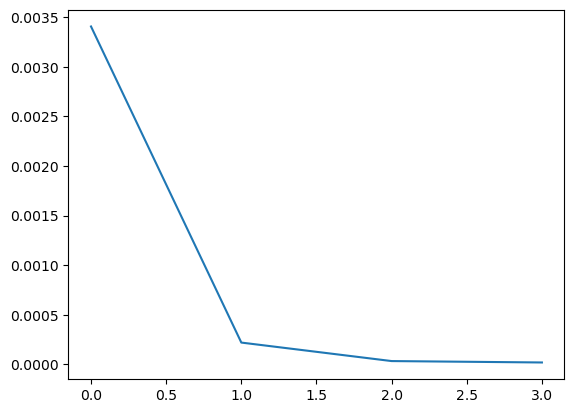

In [42]:
N = [0, 1, 2, 3]
plt.plot(N, S)
plt.show()







-----------------
P =  0.1
-----------------
Длина выборки:  5
M:  8.322295105924741  S:  3.4895532699275074
Нормальный закон
M_max:  10.889213647863912  M_min:  5.755376563985571
Распр. Стьюдента
M_max:  11.649203321178813  M_min:  4.9953868906706695
Хи квадрат
S_max:  8.278461560390046  S_min:  2.2657849700311345
-----------------
Длина выборки:  10
M:  10.704251680592108  S:  1.4169278765474564
Нормальный закон
M_max:  11.441264431314204  M_min:  9.967238929870012
Распр. Стьюдента
M_max:  11.525618143079875  M_min:  9.882885218104342
Хи квадрат
S_max:  2.33112630558743  S_min:  1.0334320865009563
-----------------
Длина выборки:  15
M:  9.654233417044754  S:  2.259295808282483
Нормальный закон
M_max:  10.613754946681272  M_min:  8.694711887408236
Распр. Стьюдента
M_max:  10.68168957967925  M_min:  8.626777254410257
Хи квадрат
S_max:  3.297870231822137  S_min:  1.7370100581184071
-----------------
Длина выборки:  30
M:  10.56766130385036  S:  2.1146262037955674
Нормальный закон

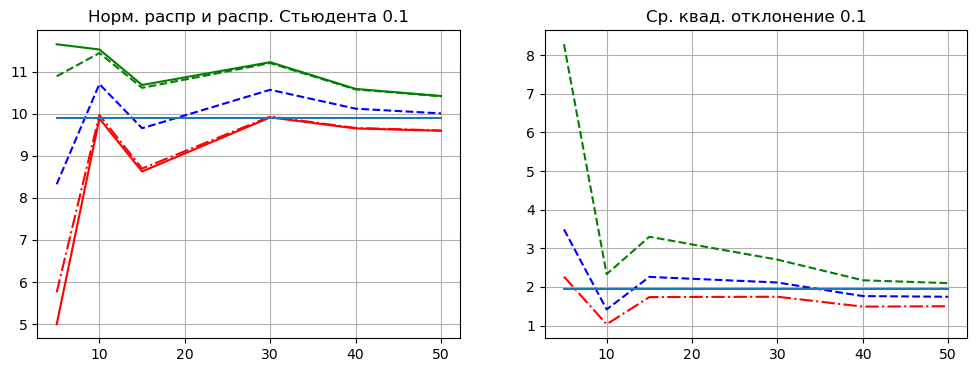

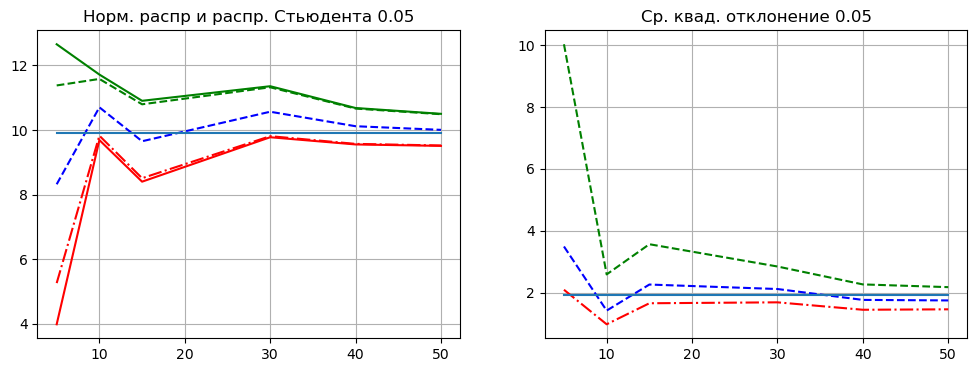

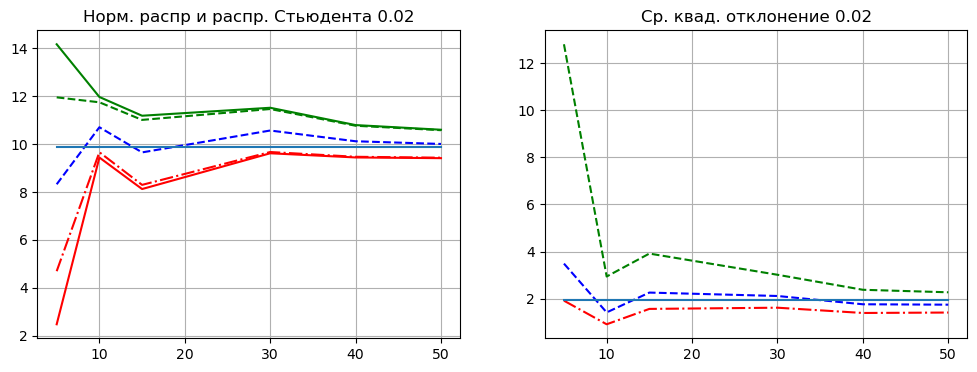

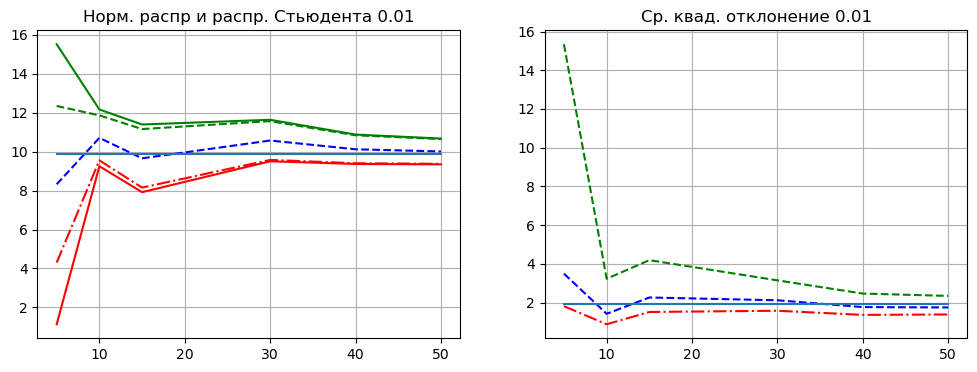

In [40]:
N = []

nums_len = [5, 10, 15, 30, 40, 50]

for i in nums_len:
    print()
    a = []
    for j in range(i):
        p = random.random()
        num = Model_N(tab_XY[0], tab_XY[1], p)
        if(num != None):
            a.append(num)
    N.append(a)

P = [0.1, 0.05, 0.02, 0.01]


for p in P:

    #normal
    m_i = []
    m_min = []
    m_max = []

    #Student
    M_i = []
    M_min = []
    M_max = []

    #chi2
    s_i = []
    s_min = []
    s_max = []

    x = []

    print("-----------------")
    print("P = ", p)

    for n in N:
        print("-----------------")
        x.append(len(n))
        print("Длина выборки: ", len(n))

        m = sum(n) / len(n)
        d = ((sum([x ** 2 for x in n]) / len(n)) - m ** 2) * ((len(n)) / (len(n) - 1))
        s = d ** 0.5

        m_i.append(m)
        M_i.append(m)

        print("M: ", m, " S: ", s)

        t_quantile = t.ppf(1-p/2, df = len(n)-1)
        norm_quantile = norm.ppf(1-p / 2, loc=0, scale=1)

        t_low = m - t_quantile * (s / (len(n)**0.5))
        t_high = m + t_quantile * (s / (len(n)**0.5))

        norm_low = m - norm_quantile * (s / (len(n)**0.5))
        norm_high = m + norm_quantile * (s / (len(n)**0.5))

        #normal
        m_min.append(norm_low)
        m_max.append(norm_high)

        #student
        M_min.append(t_low)
        M_max.append(t_high)

        chi2_low = chi2.ppf(1-(p/2), len(n) - 1)
        chi2_high = chi2.ppf((p/2), len(n) - 1)

        s_min_2 = (s ** 2 * (len(n)-1)) / chi2_low
        s_max_2 = (s ** 2 * (len(n)-1)) / chi2_high
        s_a_min = s_min_2 ** 0.5
        s_a_max = s_max_2 ** 0.5

        s_i.append(s)
        s_min.append(s_a_min)
        s_max.append(s_a_max)

        
        print("Нормальный закон")
        print("M_max: ", norm_high, " M_min: ", norm_low)
        print("Распр. Стьюдента")
        print("M_max: ", t_high, " M_min: ", t_low)
        print("Хи квадрат")
        print("S_max: ", s_a_max, " S_min: ", s_a_min)

    print()
    print("-----------------")
    print("MS")
    ms = (sum(m_i) / len(m_i))
    print(ms)
    print("Sср")
    s_sum = 0
    s_s_sum = 0
    for i in range(len(s_i)):
        s_sum += s_i[i] ** 2 * (len(N[i]) - 1)
        s_s_sum += len(N[i])
    s_s_sum -= len(N)
    s_cp = (s_sum / s_s_sum) ** 0.5
    print(s_cp)
    print("-----------------")

    y = [ms] * len(s_i)

    fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(12, 4))
    ax1.set_title("Норм. распр и распр. Стьюдента " + str(p))
    ax1.plot(x, m_min, color="red", linestyle='dashdot')
    ax1.plot(x, m_max, color="green", ls="--")

    ax1.plot(x, M_min, color="red",)
    ax1.plot(x, M_max, color="green")

    ax1.plot(x, m_i, color="blue", ls="--")
    ax1.plot(x, y)
    ax1.grid(True)

    # ax2.set_title("Распределение Стьюдента " + str(p))
    # ax2.plot(x, M_min, color="red", linestyle='dashdot')
    # ax2.plot(x, M_max, color="green", ls="--")
    # ax2.plot(x, M_i, color="blue", ls="--")
    # ax2.plot(x, y)
    # ax2.grid(True)

    y = [s_cp] * len(s_i)

    ax3.set_title("Ср. квад. отклонение " + str(p))
    ax3.plot(x, s_min, color="red", linestyle='dashdot')
    ax3.plot(x, s_max, color="green", ls="--")
    ax3.plot(x, s_i, color="blue", ls="--")
    print(len(x), len(y))
    ax3.plot(x, y)
    ax3.grid(True)